# Исследования рынка видеоигр до 2017 года

### Содержание


- [**Шаг 1. Общая информация о данных**](#part_1)
    - [1.1. Введение в проект](#101)
    - [1.2. Описание данных](#102)
    - [1.3. Выводы из общей информации о данных](#103)


- [**Шаг 2. Подготовка данных**](#part_2)
    - [2.1. Приведение названий столбцов к нижнему регистру](#201)
    - [2.2. Преобразование данных в нужные типы](#202)
    - [2.3. Обработка пропусков](#203)
    - [2.4. Обработка дубликатов](#204)
    - [2.5. Выбросы](#205)
    - [2.6. Подсчет суммарных продаж во всех регионах](#206)
    - [2.7. Выводы из предобработки данных](#207)


- [**Шаг 3. Исследовательский анализ данных**](#part_3)
    - [3.1. Сколько игр выпускалось в разные годы](#301)
    - [3.2. Как менялись продажи по платформам](#302)
    - [3.3. Определение актуального периода: какие данные нужны для прогноза на 2017 год](#303)
    - [3.4. Какие платформы лидируют по продажам](#304)
    - [3.5. График «ящик с усами» по глобальным продажам игр в разбивке по платформам](#305)
    - [3.6. Как влияют на продажи отзывы пользователей и критиков](#306)
    - [3.7. Общее распределение игр по жанрам](#307)
    - [3.8. Выводы из исследовательского анализа данных](#308)


- [**Шаг 4. Портрет пользователя каждого региона**](#part_4)
    - [4.1. Продажи по платформам в разных регионах](#401)
    - [4.2. Самые популярные жанры (топ-5) в разных регионах](#402)
    - [4.3. Влияет ли рейтинг ESRB на продажи в отдельном регионе](#403)
    - [4.4. Выводы по портрету пользователя каждого региона](#404)


- [**Шаг 5. Проверка гипотез**](#part_5)
    - [5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#501)
    - [5.2. Средние пользовательские рейтинги жанров Action и Sports разные](#502)
    - [5.3. Выводы из проверки гипотез](#503)


- [**Шаг 6. Общий вывод**](#part_6)

<a id='part_1'></a>
## Шаг 1. Общая информация о данных

<a id='101'></a>
### Введение в проект

Интернет-магазин продаёт по всему миру компьютерные игры. Из базы данных рейтингового сайта Metacritic доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Доступны данные до 2016 года, на их основе нужно выявить определяющие успешность игры закономерности, которые позволят сделать прогноз на 2017 год, сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

<a id='102'></a>
### Описание данных

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы долларов)
- `EU_sales` — продажи в Европе (миллионы долларов)
- `JP_sales` — продажи в Японии (миллионы долларов)
- `Other_sales` — продажи в других странах (миллионы долларов)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
# вызов нужных библиотек
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
# глобальные настройки отображения графиков
plt.rcParams['figure.figsize'] = (15, 9)
plt.rcParams['axes.grid'] = False
plt.rcParams['image.cmap'] = 'Set2'
sns.set_palette('Set2')

In [3]:
# # чтение датасета из CSV-файла
original_games = pd.read_csv('/datasets/games.csv')

games = original_games.copy()

In [4]:
# вывод первых и последних значений в таблице
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<a id='103'></a>
### Выводы из общей информации о данных

- Названия столбцов нужно привести к нижнему регистру, чтобы избежать возможных ошибок при их использовании в коде.
- В `year_of_release` и `user_score` сейчас указаны некорректные типы данных.
- Есть пропуски в `name`, `year_of_release`, `genre`, `critic_score`, `user_score`, `rating`.
- Также в данных о продажах встречаются нулевые значения, это может быть ошибкой или пропуском.

<a id='part_2'></a>
## Шаг 2. Подготовка данных

<a id='201'></a>
### Приведение названий столбцов к нижнему регистру

In [6]:
# сбор названий столбцов в нижний регистр в отдельный лист
lower_columns = []
for column in games.columns:
    lower_columns.append(column.lower())

# присвоение измененных названий столбцов
games.columns = lower_columns
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<a id='202'></a>
### Преобразование данных в нужные типы

Некорректные типы данных — в двух столбцах: `year_of_release` сейчас в формате десятичной дроби, а должно быть в целочисленном виде; `user_score` нужно перевести из текстового в числовой формат `float`.

Рассмотрим значала данные с годом выпуска:

In [7]:
# вывод уникальных значений столбца year_of_release
games['year_of_release'].value_counts(dropna=False)

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
NaN        269
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

В этом столбце есть пропуски, которые по умолчанию распознаются как `float`-формат. Обработка пропусков на следующем этапе сможет решить эту проблему.

Более странно выглядит тестовый формат столбца с пользовательским рейтингом, внешне в нем содержатся числа. В текущем формате использовать эти данные для анализа будет затруднительно. Такое происходит, когда в столбце кроме чисел содержатся тестовые данные. В данном случае парсер с сайта Metacritic забрал и категорию TBD (to be determined) — она ставится редакторами сайта, когда не хватает пользовательских отзывов для усредненной оценки (сейчас нужно минимум 4 отзыва). Найдем эти пропущенные оценки:

In [8]:
# вывод информации об играх, которым не был присвоен пользовательский рейтинг из-за нехватки отзывов
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Почти 2,5 тысячи игр не получили достаточно отзывов на момент сбора данных. По смыслу TBD означает отсутствие рейтинга, поэтому логично заменить эти значения пропусками:

In [9]:
# замена тестовых значений tbd на пропуски
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan

Теперь этот столбец можно перевести в числовой формат `float`:

In [10]:
# перевод столбца user_score в тип данных float64
games['user_score'] = pd.to_numeric(games['user_score'], downcast='float')
games['user_score'] = games['user_score'].astype('float64')

In [11]:
# проверка
games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

<a id='203'></a>
### Обработка пропусков

In [12]:
# вывод столбцов с пропусками
games.isna().sum()[games.isna().sum() != 0]

name                  2
year_of_release     269
genre                 2
critic_score       8578
user_score         9125
rating             6766
dtype: int64

По 2 пропуска в столбцах `name` и `genre` — вероятно, это могут быть одни и те же строки.

In [13]:
# вывод пропусков в name
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Да, так и есть: у двух игр, выпущенных на Sega Mega Drive / Genesis в 93-м году, нет названия, жанра и рейтингов; одна из этих игр при этом довольно успешная в США и Канаде. Достоверно найти эти названия, основываясь только на годе выпуска и продажах, сейчас не получится — в актуальной версии Metacritic нет данных об этой платформе, а чарты продаж в 93-м выходили в виде журналов, архив тоже не удалось найти. 

Две строки можно безопасно удалить из таблицы:

In [14]:
# удаление пропущенных строк в name и проверка
games.dropna(subset=['name'], inplace=True)
print('Осталось пропусков в name:', len(games[games['name'].isna()]))
print('Осталось пропусков в genre:', len(games[games['genre'].isna()]))

Осталось пропусков в name: 0
Осталось пропусков в genre: 0


Теперь рассмотрим 269 пропусков в `year_of_release`:

In [15]:
# вывод пропусков в year_of_release
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


По таблице незаметно, что пропуски имеют какую-то зависимость — они встречаются у игр на разных платформах, с разными жанрами и т.д. В то же время 269 пропусков — это относительно немного, поэтому их можно попробовать заполнить типичными значениями или удалить. Годы выпуска зависят от платформ, потому что на них выходили новые игры только в период поддержки платформы.

In [16]:
# вывод медианных значений year_of_release по платформам
games.groupby('platform')['year_of_release'].median().value_counts().sort_index()

1982.0    1
1986.5    1
1992.0    1
1993.0    1
1994.0    2
1994.5    1
1995.0    2
1996.0    2
1997.0    1
1998.0    1
1999.0    1
2000.0    2
2003.0    2
2004.0    1
2005.0    1
2008.0    1
2009.0    2
2010.0    2
2011.0    1
2013.0    2
2014.0    1
2015.0    2
Name: year_of_release, dtype: int64

In [17]:
# сохранение описательных статистик до преобразования
stats_before = games['year_of_release'].describe()

# заполнение пропусков медианами, сгруппированными по платформам, и перевод данных в нужный тип
games['year_of_release'] = games.groupby('platform')['year_of_release'].apply(lambda x: x.fillna(x.median()))
games['year_of_release'] = games['year_of_release'].astype(int)

# проверка описательных статистик после преобразования
stats_after = games['year_of_release'].describe()
with pd.option_context('display.float_format', '{:.0f}'.format):
    display(pd.DataFrame({ 'before': stats_before, 'after': stats_after }))

,before,after
count,16444,16713
mean,2006,2006
std,6,6
min,1980,1980
25%,2003,2003
50%,2007,2007
75%,2010,2010
max,2016,2016


Значения остались те же самые, какого-то перекоса в данных не случилось. Похоже, что здесь можно оставить такую процедуру. Не совсем понятно, почему эти года были пропущены — возможно, была какая-то техническая ошибка.

Много пропусков содержатся в столбцах с оценками и рейтингами, а в `user_score` пришлось еще и добавить пропусков заместо значений TBD. Изучим эти данные: рассмотрим распределение игр без рейтингов по годам и оценим взаимосвязь между рейтингами и продажами для поиска возможных закономерностей.

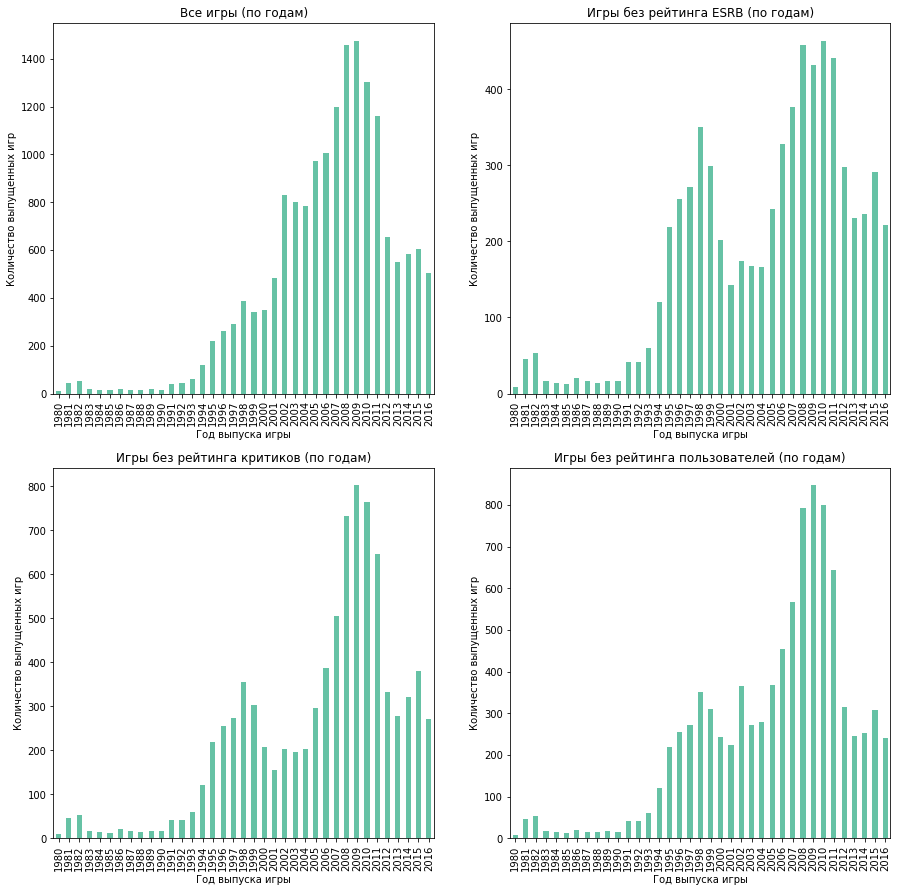

In [18]:
fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(221)
(games['year_of_release'].value_counts().sort_index()
 .plot(kind='bar', ax=ax1, title='Все игры (по годам)')
 .set(xlabel='Год выпуска игры', ylabel='Количество выпущенных игр'))

ax2 = fig.add_subplot(222)
(games.query('rating.isna()')['year_of_release'].value_counts().sort_index()
 .plot(kind='bar', ax=ax2, title='Игры без рейтинга ESRB (по годам)')
 .set(xlabel='Год выпуска игры', ylabel='Количество выпущенных игр'))

ax3 = fig.add_subplot(223)
(games.query('critic_score.isna()')['year_of_release'].value_counts().sort_index()
 .plot(kind='bar', ax=ax3, title='Игры без рейтинга критиков (по годам)')
 .set(xlabel='Год выпуска игры', ylabel='Количество выпущенных игр'))

ax4 = fig.add_subplot(224)
(games.query('user_score.isna()')['year_of_release'].value_counts().sort_index()
 .plot(kind='bar', ax=ax4, title='Игры без рейтинга пользователей (по годам)')
 .set(xlabel='Год выпуска игры', ylabel='Количество выпущенных игр'));

In [19]:
# распределение игр с пропусками по годам
(games['year_of_release'].value_counts().to_frame(name='years_all')
 .join(games.query('critic_score.isna()')['year_of_release'].value_counts().rename('years_critic'), 
       how='outer')
 .join(games.query('user_score.isna()')['year_of_release'].value_counts().rename('years_user'), 
       how='outer')
 .join(games.query('rating.isna()')['year_of_release'].value_counts().rename('years_rating'), 
       how='outer')
 .sort_index())

,years_all,years_critic,years_user,years_rating
1980,9,9,9,9
1981,46,46,46,46
1982,53,53,53,53
1983,17,17,17,17
1984,14,14,14,14
1985,14,13,13,13
1986,21,21,21,21
1987,16,16,16,16
1988,15,14,14,14
1989,17,17,17,17


Для игр до 1998 года включительно почти нет никаких рейтингов на Metacritic, далее пропуски распределелены менее равномерно. 

Здесь о причине можно предположить следующее: сайт был запущен в январе 2001 года после двух лет разработки и, вероятно, не включал в себя возможность собирать данные ретроспективно. Возможно, в дальнейшем наименования игр и какую-то общую информацию о них добавляли в базу — ведь названия игр есть — но рейтинги им уже не выставляли (очевидно, непросто найти отзывы критиков об игре 1980 года). На текущей версии сайта, например, не представлены классические игры, даже самые популярные вроде *Super Mario Bros.* Беглым поиском не получилось найти какие-либо игры старше 1999, для которых нет рейтинга.

Для более поздних игр пропуски занимают разные доли от общих данных, есть игры, для которых нет никаких пропусков. В их числе тоже встречаются довольно популярные позиции (например, *FIFA 10* или *The Legend of Zelda: Ocarina of Time*), для которых есть рейтинги на сайте Metacritic. Насчет них есть предположение (кроме сбоя работы парсера), что рейтинги пропущены у мультиплатформенных игр — тех, которые выходили одновременно на нескольких платформах. На сайте это разные позиции, в таблице они также представлены в отдельном экземпляре для каждой платформы, на которой они вышли. Очевидно, что платформы неодинаково популярны, а также нередко старые, но успешные игры переиздают спустя несколько лет. Соответственно, оценки могли оставить для самых популярных платформ в период выхода игры, а остальные релизы уже оставить без внимания. Однако если такие случаи есть, неправильно будет просто продублировать рейтинги с одной платформы на другую — они могут быть похожие, но неодинаковые; соответственно, это может привести к искажениям в данных.

In [20]:
for score in ['critic_score', 'user_score', 'rating']:
    for sales in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
        print('Продаж без '+score+' в '+sales+':', games.query(score+'.isna()')[sales].sum())
    print()

Продаж без critic_score в na_sales: 1528.3700000000001
Продаж без critic_score в eu_sales: 729.1100000000001
Продаж без critic_score в jp_sales: 849.5799999999998
Продаж без critic_score в other_sales: 201.84000000000003

Продаж без user_score в na_sales: 1548.1300000000003
Продаж без user_score в eu_sales: 717.2
Продаж без user_score в jp_sales: 848.83
Продаж без user_score в other_sales: 188.67999999999998

Продаж без rating в na_sales: 1240.68
Продаж без rating в eu_sales: 613.3
Продаж без rating в jp_sales: 841.9299999999998
Продаж без rating в other_sales: 151.0



Можно было бы также предположить, что рейтинги не были выставлены играм, которые меньше продавались в каком-то из регионов — например, если игра была популярна только на японском рынке и вызвала мало интереса в других регионах. Но из подсчетов непохоже, что здесь есть какая-то связь.

В итоге мы не видим в датасете тех данных, которые помогут заполнить пропуски какими-либо типичными значениями без искажения; пропуски занимают большую долю в общих данных, чтобы заполнение типичными значениями было разумным. Оставим их как они есть и будем исключать строки с пропущенными значениями в этих столбцах там, где будут использоваться средние значения.

In [21]:
# оставшиеся пропуски после обработки
games.isna().sum()[games.isna().sum() != 0]

critic_score    8576
user_score      9123
rating          6764
dtype: int64

<a id='204'></a>
### Обработка дубликатов

Подсчитаем количество полных дубликатов в таблице и попробуем найти скрытые дубликаты в тестовых данных.

In [22]:
print('Полных дубликатов:', len(games[games.duplicated()]))

Полных дубликатов: 0


Полностью дублированных строчек не найдено.

In [23]:
games['name'].value_counts()[games['name'].value_counts() > 1]

Need for Speed: Most Wanted                        12
Madden NFL 07                                       9
FIFA 14                                             9
Ratatouille                                         9
LEGO Marvel Super Heroes                            9
                                                   ..
Sébastien Loeb Rally Evo                            2
Nodame Cantabile                                    2
iCarly 2: iJoin The Click!                          2
NASCAR: Dirt to Daytona                             2
Disney TH!NK Fast: The Ultimate Trivia Showdown     2
Name: name, Length: 2805, dtype: int64

In [24]:
games.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [25]:
games.query('name == "FIFA 14"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E
271,FIFA 14,X360,2013,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E
469,FIFA 14,PS4,2013,Sports,0.61,1.85,0.11,0.44,87.0,6.3,E
1753,FIFA 14,XOne,2013,Sports,0.41,0.66,0.00,0.09,88.0,5.8,E
4699,FIFA 14,PSV,2013,Sports,0.08,0.23,0.01,0.09,NaN,1.8,E
4809,FIFA 14,PC,2013,Sports,0.01,0.36,0.00,0.03,87.0,4.6,E
4985,FIFA 14,Wii,2013,Sports,0.00,0.36,0.00,0.02,NaN,4.3,E
6871,FIFA 14,3DS,2013,Sports,0.00,0.22,0.00,0.01,NaN,NaN,NaN
7875,FIFA 14,PSP,2013,Sports,0.00,0.15,0.00,0.04,NaN,3.4,E


В названиях игр есть повторяющиеся значения, но это не ошибка — как мы упоминали выше, одни и те же игры могут издаваться на разных платформах, и в таблице это разные позиции для каждой платформы со своим набором данных о продажах и рейтингах.

In [26]:
games['platform'].value_counts().sort_index()

2600     133
3DO        3
3DS      520
DC        52
DS      2151
GB        98
GBA      822
GC       556
GEN       27
GG         1
N64      319
NES       98
NG        12
PC       974
PCFX       1
PS      1197
PS2     2161
PS3     1331
PS4      392
PSP     1209
PSV      430
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1320
WiiU     147
X360    1262
XB       824
XOne     247
Name: platform, dtype: int64

In [27]:
games['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

Также нет ошибок в названиях платформ и жанров.

In [28]:
games['rating'].value_counts().sort_index()

AO         1
E       3990
E10+    1420
EC         8
K-A        3
M       1563
RP         3
T       2961
Name: rating, dtype: int64

In [29]:
games.loc[games['rating'] == 'K-A', 'rating'] = 'E'

Рейтинги ESRB указаны правильно, кроме одного значения: рейтинг K-A (Kids to Adults) — это старое название рейтинга E (Everyone), использовалось до 1998 года. Поэтому их можно объединить.

<a id='205'></a>
### Выбросы

Выбросы могут быть в данных о продажах; кроме того, были заметны нулевые значения продаж. Оценим распределение данных в этих столбцах с помощью диаграммы распределения:

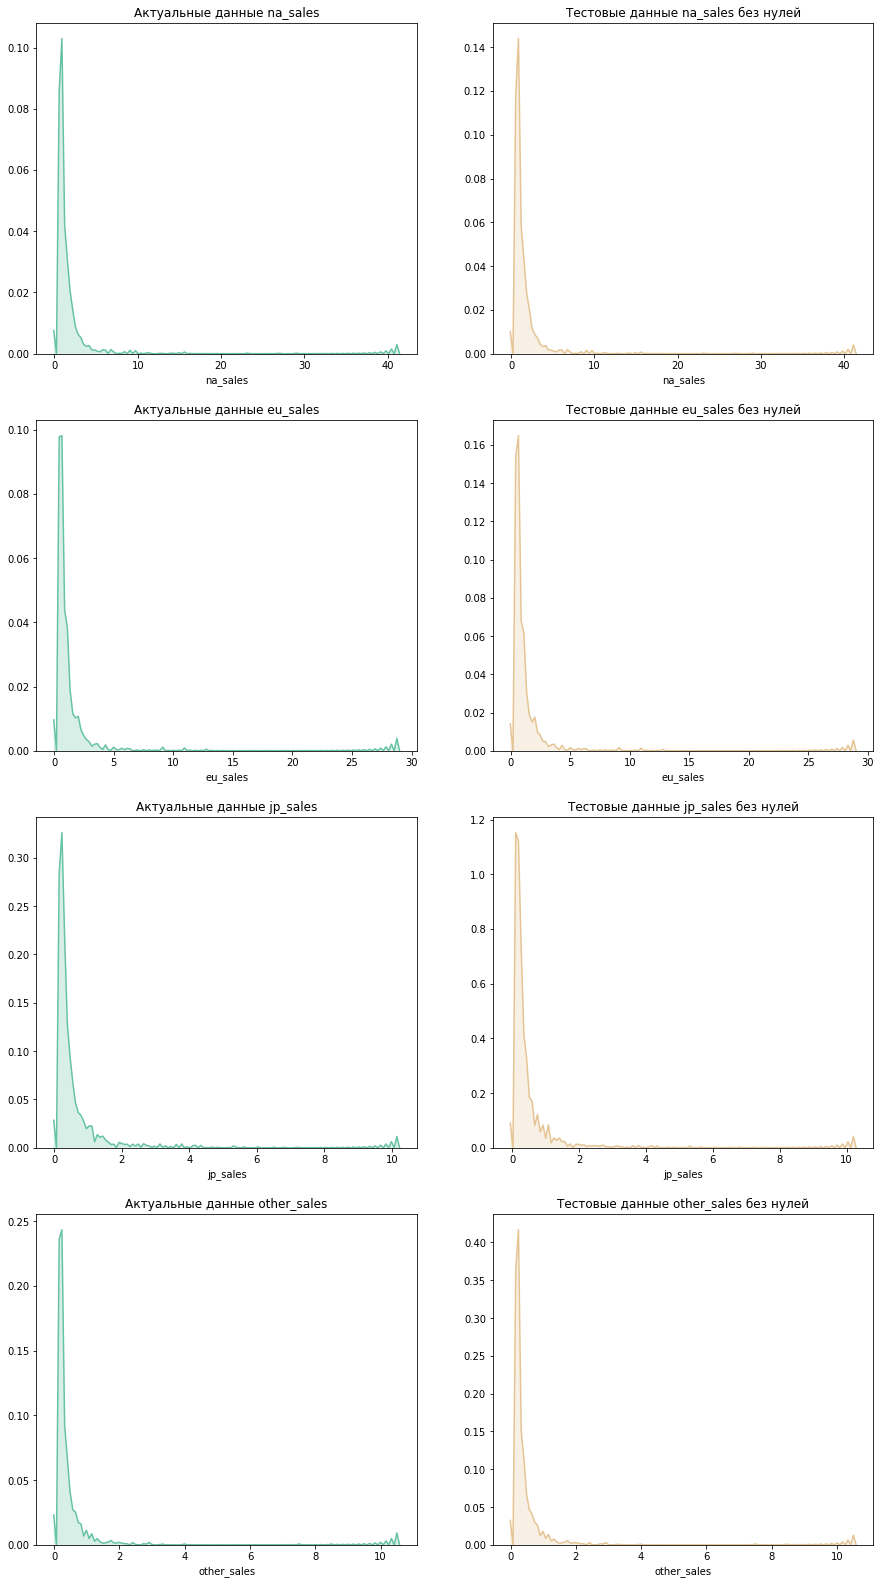

In [30]:
fig, ax = plt.subplots(4, 2, figsize=(15, 28))
test_data = games.copy()
i = 0
    
for column in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    sns.distplot(games[column], hist=False, kde_kws={'shade': True}, 
                 ax=ax[i, 0]).set_title('Актуальные данные '+column)
    
    test_data.loc[test_data[column] == 0, column] = np.nan
    sns.distplot(test_data[column], hist=False, kde_kws={'shade': True}, color='#e5c494', 
                 ax=ax[i, 1]).set_title('Тестовые данные '+column+' без нулей')
    
    i += 1

По диаграммам мы видим, что абсолютное большинство всех значений собрано возле нуля, и даже удаление нулей не меняет ситуацию значительно. Возможно, это какие-то сверхмалые продажи или отсутствие продаж в этом регионе. Рассмотрим их подробнее:

In [31]:
with pd.option_context('display.float_format', '{:.20f}'.format):
    display(games.query('na_sales < 0.01')['na_sales'])

215     0.00000000000000000000
340     0.00000000000000000000
385     0.00000000000000000000
403     0.00000000000000000000
428     0.00000000000000000000
                 ...          
16709   0.00000000000000000000
16710   0.00000000000000000000
16711   0.00000000000000000000
16712   0.00000000000000000000
16714   0.00000000000000000000
Name: na_sales, Length: 4507, dtype: float64

In [32]:
with pd.option_context('display.float_format', '{:.20f}'.format):
    display(games.query('na_sales != 0')['na_sales'])

0       41.35999999999999943157
1       29.07999999999999829470
2       15.67999999999999971578
3       15.60999999999999943157
4       11.26999999999999957367
                  ...          
16698    0.01000000000000000021
16704    0.01000000000000000021
16706    0.01000000000000000021
16708    0.01000000000000000021
16713    0.01000000000000000021
Name: na_sales, Length: 12206, dtype: float64

Все-таки очень небольшие продажи встречаются, но они не настолько небольшие, чтобы выглядеть как нули. И нулевых значений довольно много, 4507. Посмотрим, есть ли игры, для которых все продажи нулевые:

In [33]:
games.query('na_sales == 0 and eu_sales == 0 and jp_sales == 0 and other_sales == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN


Всего две игры. Значит, для остальных 4505 есть данные о продажах хотя бы в одном регионе, такое возможно.

In [34]:
with pd.option_context('display.float_format', '{:.2f}'.format):
    display(games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].describe())

,na_sales,eu_sales,jp_sales,other_sales
count,16713.00,16713.00,16713.00,16713.00
mean,0.26,0.15,0.08,0.05
std,0.81,0.50,0.31,0.19
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,0.08,0.02,0.00,0.01
75%,0.24,0.11,0.04,0.03
max,41.36,28.96,10.22,10.57


Разброс между минимальными и максимальными значениями продаж очень велик, а большинство значений не превышают 0,24 млн долларов. При этом игры с большими значениями вполне могут существовать, это ограниченное количество бестселлеров. Процедура очистки от пропусков приведет к тому, что мы избавимся от этих игр — это неправильно для дальнейшего анализа. Поэтому оставим эти данные в том же виде.

Выбросы также теоретически могут быть в значениях оценок критиков и пользователей, хотя это рейтинговая шкала с ограниченным разбросом значений. Для уверенности также изучим распределение в этих столбцах:

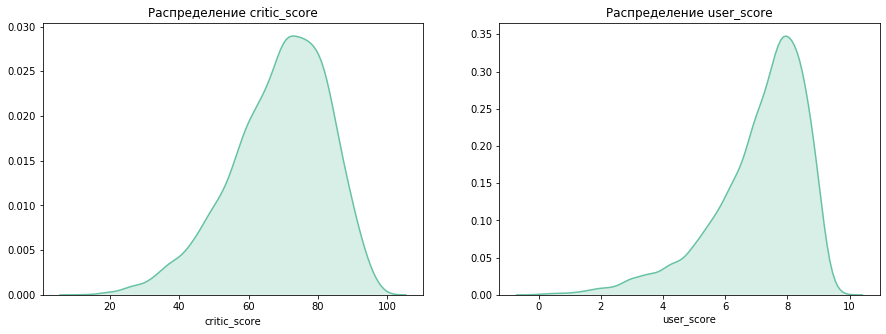

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
i = 0

for column in ['critic_score', 'user_score']:
    sns.distplot(games[column], hist=False, kde_kws={'shade': True}, ax=ax[i])
    ax[i].set_title('Распределение '+column)
    i += 1;

Здесь ничего аномального не наблюдается. В обоих случаях заметен сдвиг в сторону более высоких оценок, но это типично для рейтинговых шкал. Здесь тоже оставляем, как есть.

<a id='206'></a>
### Подсчет суммарных продаж во всех регионах

In [36]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16713, dtype: float64

<a id='207'></a>
### Выводы из предобработки данных

- Все названия столбцов приведены к нижнему регистру для удобства.
- Данные переведены в нужные типы. Некорректные типы данных были в двух столбцах: `year_of_release` был в формате `float` из-за пропусков, которые классифицируются этим типом; `user_score` был в формате `object` из-за категории TBD — она обозначала не выставленный рейтинг из-за нехватки оценок пользователей, по смыслу это означает, что для этих игр нет пользовательского рейтинга.
- 2 пропуска в `name` и `genre` были в одних и тех же строках, их пришлось удалить; 269 пропусков в `year_of_release` удалось заполнить медианными значениями, сгруппированными по платформам; для многочисленных пропусков в столбцах с рейтингами подходящей адекватной замены не нашлось, пропуски в этих столбцах остались.
- В стобце с рейтингом ESRB были найдены 3 значения с дублированной категорией, которые были объединены с более крупной группой; в остальном ни полные, ни скрытые дубликаты не были обнаружены.
- Данные о продажах и оценках критиков и пользователей проверили на выбросы: хотя распределения данных там далеки от идеальных и формально выбросы есть в большом количестве, избавление от них сильно испортит дальнейший анализ данных, поэтому эти значения остались без изменений.

<a id='part_3'></a>
## Шаг 3. Исследовательский анализ данных

<a id='301'></a>
### Сколько игр выпускалось в разные годы

Чтобы посмотреть, сколько игр выпускалось в разные годы, выведем столбцовый график:

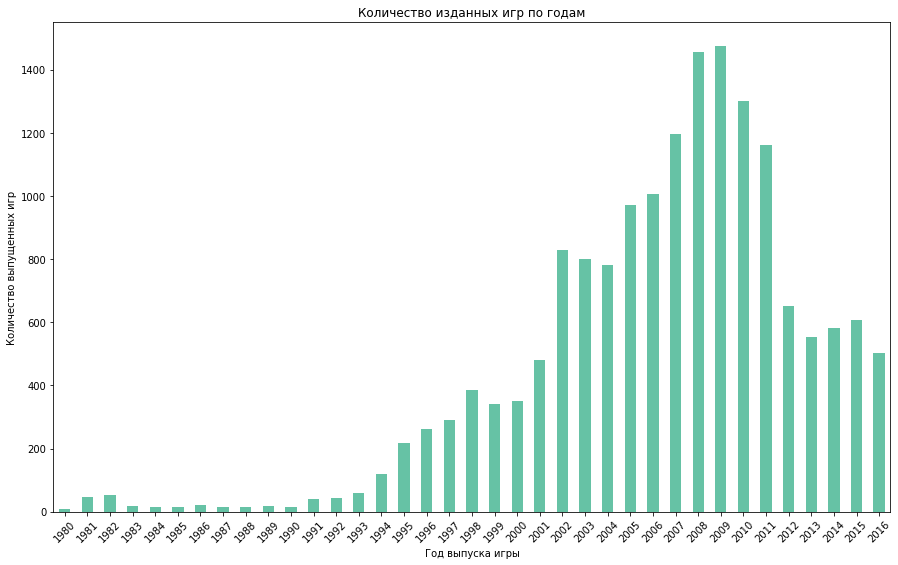

In [37]:
(games['year_of_release'].value_counts().sort_index()
 .plot(kind='bar', rot=45, title='Количество изданных игр по годам')
 .set(xlabel='Год выпуска игры', ylabel='Количество выпущенных игр'));

Визуально можно определить несколько периодов, по которым выпуск игр различается: 1994-2001, 2002-2007, 2008-2011, 2012-2016. Это разделение можно рассмотреть в контексте платформ, на которых выпускались игры. Вообще игровые приставки принято объединять в поколения — группы с общими годами продаж и схожим аппаратным и программным оснащением. Некоторое исключение здесь — персональный компьютер (*PC*): он вписывается в разные поколения по техническим возможностям и делит долю продаж (многие игры выходят сразу на нескольких платформах), но в данных нет специального разделения на поколения ПК как игровой платформы, эта разница видна только по годам. Кроме того, традиционно развивают технологии, механики и восприятие игр именно приставки.

Хотя разные устройства в рамках одного поколения определенно конкурируют за внимание игроков и место в доме, успешность отдельных приставок обычно влияет на успешность всего поколения: например, если на *Playstation 4* выходят «громкие» релизы, которые привлекают внимание людей за пределами сообщества «хардкорных» игроков, это помогает и продажам *Xbox One* через интерес к индустрии в целом. Поэтому такая обобщенная временная перспектива позволяет делать оценку выпуска игр и выручки издателей по временным периодам.

Кроме того, поколения накладываются друг на друга: так, с 2011 года идет последнее 8-е поколение игровых платформ, а предыдущее 7-е поколение продолжается с 2005 года (однако, официальная поддержка всех консолей этого поколения на конец 2016 года уже прекращена). Т.е. при выходе новых приставок предыдущие продолжают поддерживаться, на них ещё некоторое время выходят новые игры, старые пользуются спросом. Самые успешные игры обычно выходят ближе к концу поколения, когда разработчики могут раскрыть максимум возможностей аппаратного оснащения консоли, поэтому часто эти игры перевыпускают на следующих поколениях: например, выдающаяся сюжетно и технически игра *The Last of Us* сначала вышла на *PS3*, а через год была перевыпущена на *PS4*. Поэтому есть смысл рассматривать продажи внутри всего поколения даже при наличии более новых консолей.

<a id='302'></a>
### Как менялись продажи по платформам

Посмотрим, на каких платформах суммарные продажи — самые высокие:

In [38]:
# выбор платформ с наибольшим количеством продаж
display(games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10))
top_sales_platforms = games.groupby('platform')['total_sales'].sum().sort_values().tail(6)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64

Здесь видно, что больше всего за наблюдаемый период заработали 6 платформ: *Xbox 360*, *Sony Playstation 1, 2* и *3*, а также *Nintendo DS* и *Wii*. При этом *Xbox 360, PS3, Wii* и *DS* принадлежат к одному поколению (2005-2017). Рассмотрим, как распределялись продажи игр на этих платформах в пределах их срока выпуска:

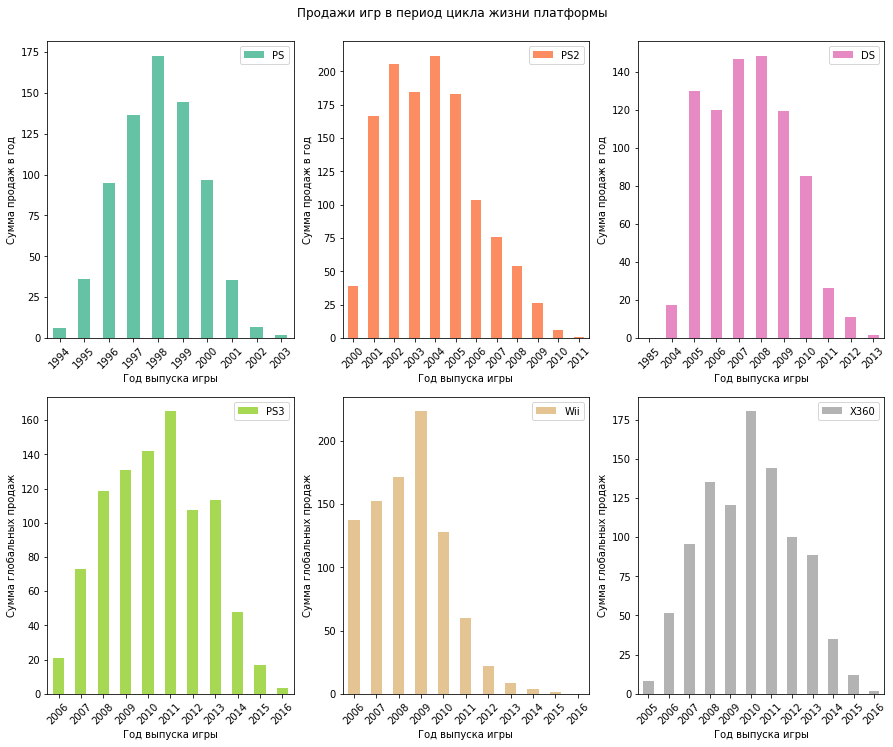

In [39]:
fig, ax = plt.subplots(2, 3, figsize=(15, 12))
i = 0
j = 0

# получение отдельных цветов в указанной цветовой схеме
cmap = plt.get_cmap('Set2', len(top_sales_platforms.index))

# графики для первого ряда сетки
for platform in top_sales_platforms.sort_index().index[[1, 2, 0]]:
    (games[games['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
     .plot(kind='bar', ax=ax[0, i], color=cmap(i), rot=45, label=platform)
     .set(xlabel='Год выпуска игры', ylabel='Сумма продаж в год'))
    ax[0, i].legend()
    i += 1

# графики для второго ряда сетки
for platform in top_sales_platforms.sort_index().index[3:]:
    (games[games['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
     .plot(kind='bar', ax=ax[1, j], color=cmap(i+j), rot=45, label=platform)
     .set(xlabel='Год выпуска игры', ylabel='Сумма глобальных продаж'))
    ax[1, j].legend()
    j += 1

plt.suptitle('Продажи игр в период цикла жизни платформы', y=0.92);

На графиках мы наблюдаем с небольшими отклонениями очень схожие тенденции с постепенным ростом от старта продаж, пика посередине периода жизни консоли и плавного снижения продаж к концу периода. Заметное снижение по сравнению с предыдущим годом происходит в год выпуска консолей следующего поколения: 
- *PS2* была анонсирована в 1999 и выпущена в 2000 году, в эти же годы продажи игр *PS1* начинают снижаться; 
- также происходит и с *PS2*, когда *PS3* поступила в продажу в 2006 году. 
Это значит, что продажи игр следуют за циклом обновления консолей.

Касаемо отклонений от тенденции:
- *PS2* является самой быстропродаваемой и популярной консолью в истории, как раз на нее приходится больше всего игр в нашей таблице; кроме того, *PS2* поддерживалась дольше всех других консолей, 13 лет. Это и показывает правосторонняя асимметрия на графике: много продаж в первые годы и более длинный хвост.
- У *Nintendo Wii* продажи игр на поздних этапах жизни платформы начали падать раньше, чем у других консолей этого же поколения — это потому, что ее официальная поддержка закончилась раньше, в 2013 году с выпуском *Nintendo Wii U*. Для сравнения, *Xbox 360* и *PS3* поддерживались до 2016 года, поэтому там снижение продаж более плавное.

Также заметно, что для *Nintendo DS* есть столбец с 1985 годом, но это может быть ошибкой: консоль была выпущена в 2004 году. Рассмотрим, что за игры попали в этот период:

In [40]:
games.query('platform == "DS" and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


Найти игру с таким названием совсем не получилось; одну строку можно безопасно удалить из таблицы.

In [41]:
games = games.drop(games.query('platform == "DS" and year_of_release == 1985').index[0])
games.query('platform == "DS"')['year_of_release'].value_counts().sort_index()

2004     23
2005    118
2006    201
2007    376
2008    522
2009    403
2010    323
2011    153
2012     23
2013      8
Name: year_of_release, dtype: int64

Теперь, когда все годы указаны верно, мы можем высчитать период, в течение которого сохраняется спрос на игры самых популярных консолей (учитывая, что данные ограничены 2016-м годом):

In [42]:
for platform in top_sales_platforms.index:
    print('Время жизни платформы', platform+':', (games[games['platform'] == platform]['year_of_release']
                                                  .value_counts().sort_index().index[-1] - \
                                                  games[games['platform'] == platform]['year_of_release']
                                                  .value_counts().sort_index().index[0]), 'лет')

Время жизни платформы PS: 9 лет
Время жизни платформы DS: 9 лет
Время жизни платформы Wii: 10 лет
Время жизни платформы PS3: 10 лет
Время жизни платформы X360: 11 лет
Время жизни платформы PS2: 11 лет


Выходит, что примерное время жизни платформы — 10 лет. Как было сказано выше, *PS2* официально поддерживалась 13 лет, с 2000 по 2013 год. Но в наших данных последние продажи игр этой платформы пришлись на 2011 год — видимо, к этому времени уже ничего не выпускали. Это объяснимо: в 2013 уже была выпущена *PS4*.

<a id='303'></a>
### Определение актуального периода: какие данные нужны для прогноза на 2017 год

Итак, из наших данных мы знаем, что в выпуске игр есть наблюдаемые периоды роста, которые занимают несколько лет, что продажи игр подчиняются циклу обновления платформ и что время жизни платформы составляет около 10 лет. Исходя из этого, мы можем определить тот период, который поможет сделать прогноз на 2017 год.

На конец 2016 года ситуация такая: актуальное поколение консолей — 8-е поколение, куда входят домашние приставки *Sony PS4*, *Microsoft Xbox One* и *Nintendo Wii U*, а также портативные консоли *Sony PS Vita* и *Nintendo 3DS*. Предыдущее, 7-е поколение, которое началось в конце 2005-го, к этому времени заканчивается, производители объявляют о завершении поддержки этих платформ. По предыдущим графикам мы видели, что 3 основные консоли 7-го поколения (*PS3*, *Xbox360* и *Wii*) показывают минимальные продажи в 2016-м году.

Следовательно, нам стоит взять для анализа игры на платформах 8-го поколения, которые начали продаваться в 2011 году, а также ПК-релизы за этот же период. Для надежности сравним количество выпущенных с 2011 по 2016 год игр для двух поколений, а также уровень продаж.

In [43]:
games_gen7 = (games.query("platform.isin(['PS3', 'X360', 'Wii', 'PSP', 'DS']) and year_of_release >= 2011")
              .sort_index())
games_gen8 = (games.query("platform.isin(['PS4', 'XOne', 'WiiU', 'PSV', '3DS'])")
              .append(games.query("platform == 'PC' and year_of_release >= 2011")).sort_index())

print('Игр выпущено в 7-м поколении консолей с 2011 года:', len(games_gen7))
print('Игр выпущено в 8-м поколении консолей с 2011 года:', len(games_gen8))

Игр выпущено в 7-м поколении консолей с 2011 года: 1924
Игр выпущено в 8-м поколении консолей с 2011 года: 2125


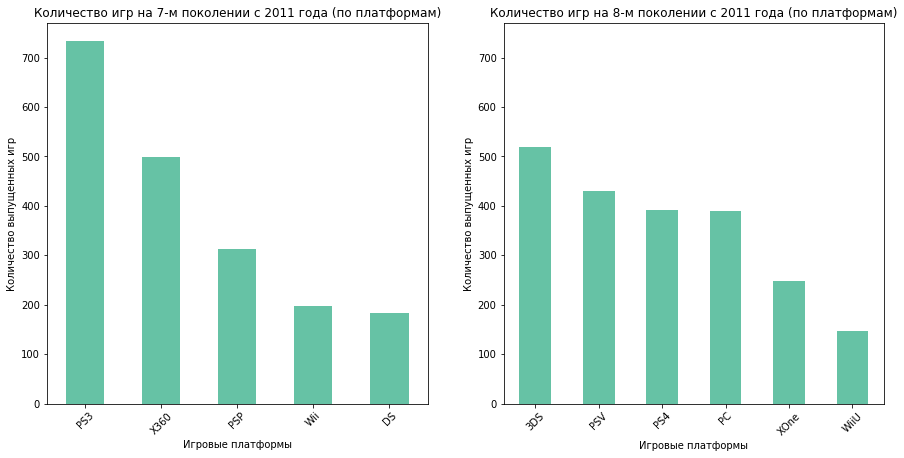

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
i = 0
j = 7

for data in [games_gen7, games_gen8]:
    (data['platform'].value_counts()
     .plot(kind='bar', ax=ax[i], ylim=(0, 770), rot=45, 
           title='Количество игр на ' + str(j) + '-м поколении с 2011 года (по платформам)')
     .set(xlabel='Игровые платформы', ylabel='Количество выпущенных игр'))
    i += 1
    j += 1;

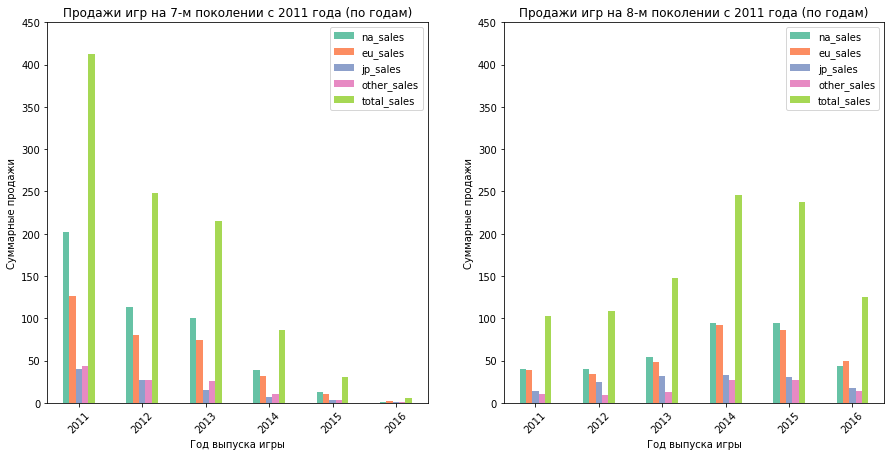

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
i = 0
j = 7

for data in [games_gen7, games_gen8]:
    (data[[x for x in data.columns if 'sales' in x] + ['year_of_release']].groupby('year_of_release').sum()
     .plot(kind='bar', ax=ax[i], ylim=(0, 450), rot=45, 
           title='Продажи игр на ' + str(j) + '-м поколении с 2011 года (по годам)')
     .set(xlabel='Год выпуска игры', ylabel='Суммарные продажи'))
    i += 1
    j += 1;

Хотя с 2011 по 2016 год количество новых игр на двух поколениях схожее (нужно учесть, что мы добавляем ПК-релизы только к 8-му поколению, а на них приходится почти 389 наименований), выручка от игр 7-го поколения от года в год падает; 2011-й год — ещё пик развития этого поколения консолей, а с 2014-го продажи уже уступают новым платформам. Для 8-го поколения продажи, наоборот, растут; как мы знаем из изучения цикла жизни консолей, здесь можно ожидать постоянный рост выручки в следующие 2-3 года. Мы также видим, что в 2016-м выручка проседается — возможно, данные о продажах доступны не за весь 2016-й год; многие бестселлеры выходят к концу года.

Таким образом, мы можем смело остановиться на данных о платформах 8-м поколения.

<a id='304'></a>
### Какие платформы лидируют по продажам

Рассмотрим, насколько успешными по продажам оказались платформы 8-го поколения 2011 по 2016 год:

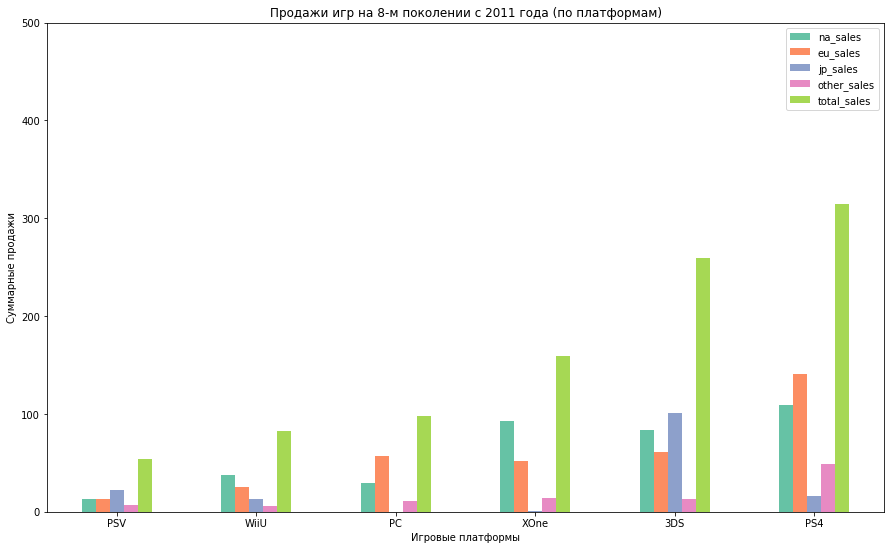

In [46]:
(games_gen8[[x for x in games_gen8.columns if 'sales' in x] + ['platform']].groupby('platform').sum()
 .sort_values(by='total_sales')
 .plot(kind='bar', ylim=(0, 500), rot=0, title='Продажи игр на 8-м поколении с 2011 года (по платформам)')
 .set(xlabel='Игровые платформы', ylabel='Суммарные продажи'));

За первые 5 лет текущего поколения наиболее успешной платформой оказалась *PS4*: суммарные продажи почти в 2 раза выше результатов прямого конкурента *Xbox One* и почти в 4 раза выше домашней консоли *Wii U*. На втором месте — портативная консоль *Nintendo 3DS*, ее продажи по сравнению с прямым конкурентом *PS Vita* выше почти в 5 раз. Из региональных различий хочется отдельно отметить, что в Японии абсолютным лидером является *3DS*.

<a id='305'></a>
### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

С помощью графика «ящик с усами» сможем оценить разброс в глобальных продажах игр по платформам:

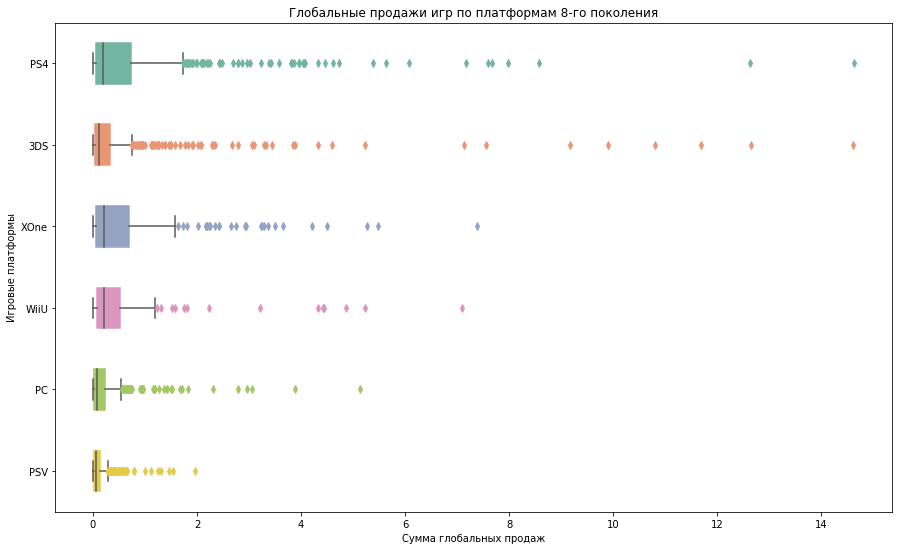

In [47]:
fig, ax = plt.subplots()
sns.boxplot(x='total_sales', 
            y='platform', 
            data=games_gen8, 
            orient='h', 
            width=.5, 
            ax=ax).set(xlabel='Сумма глобальных продаж', 
                       ylabel='Игровые платформы', 
                       title='Глобальные продажи игр по платформам 8-го поколения')

for i, artist in enumerate(ax.artists):
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    for j in range(i*6, i*6+6):
        line = ax.lines[j]
        line.set_mfc(col)
        line.set_mec(col);

На всех изучаемых нами платформах выручка от большинства игр относительно небольшая: у самой успешной домашней консоли *PS4* продажи почти всех игр находятся в пределах до 1,75 млн долларов; для сравнения большинство игр на *ПК* продаются на сумму чуть больше 500 тыс долларов. Для продаж по всему миру за 5 лет, с учетом, что в целом игры могут пользоваться спросом в течение нескольких лет после выпуска, это нельзя назвать большими суммами. В то же самое время у всех платформ большое количество значений, которые считаются выбросами относительно большинства значений; у *PS4* выручка за игры на верхнем пороге нормы (верхний квартиль плюс полторы сигмы) и самые успешные игры в целом различается более чем в 8 раз. Это значит, двигателями продаж для всех платформ является небольшое количество бестселлеров. 

Ещё мы видим, что при сравнении прямых конкурентов *PS4* и *Xbox One* у приставки Sony больше успешных игр в целом, а наиболее успешные продаются значительно лучше. Это может быть связано, во-первых, с большим количеством продаж самой *PS4* по сравнению с *Xbox One* — 53,4 млн штук у Sony против 19,1 млн штук у Microsoft к началу 2017 года, и разницей в количестве и успешности эксклюзивных игр на двух платформах.

На портативных консолях видим также значительный разрыв между лидирующей *Nintendo 3DS* и находящейся на последнем месте *PS Vita*. Объяснить это можно в том числе разницей в количестве проданных консолей — *3DS* (65,3 млн шт) продано в 4,5 раз больше *PS Vita* (15 млн шт). Кроме того, многие игры на *PS Vita* были переизданиями релизов с предыдущих консолей Playstation, а в актуальные игры на *PS4* можно было играть через удаленное подключение, для этого не требовалась отдельная покупка игры. *Nintendo 3DS* же в этом смысле — более самостоятельная платформа, на ней значительно больше эксклюзивных игр, разработанных только под эту приставку.

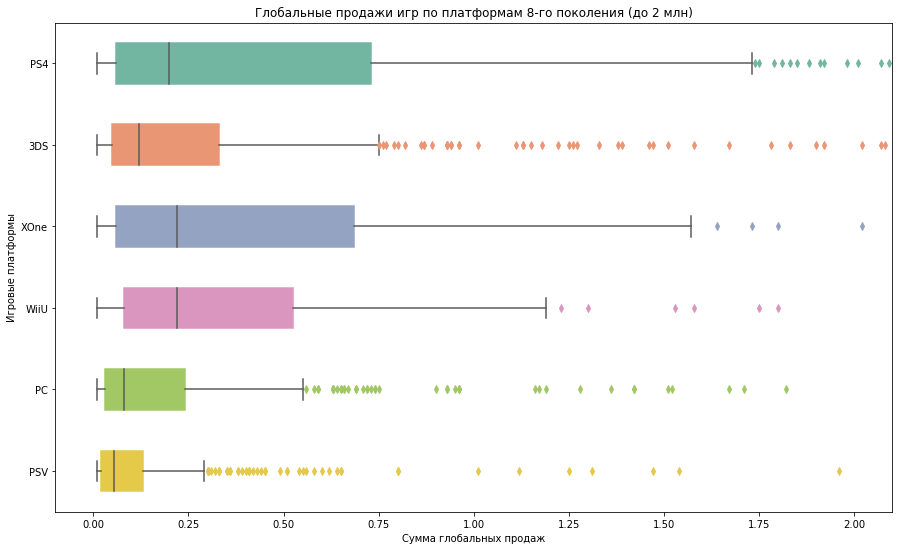

In [48]:
fig, ax = plt.subplots()
sns.boxplot(x='total_sales', 
            y='platform', 
            data=games_gen8, 
            orient='h', 
            width=.5, 
            ax=ax).set(xlabel='Сумма глобальных продаж', 
                       ylabel='Игровые платформы', 
                       title='Глобальные продажи игр по платформам 8-го поколения (до 2 млн)', 
                       xlim=(-0.1, 2.1))

for i, artist in enumerate(ax.artists):
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    for j in range(i*6, i*6+6):
        line = ax.lines[j]
        line.set_markerfacecolor(col)
        line.set_markeredgecolor(col);

Как было сказано выше, выручка большинства игр относительно небольшая: мы видим верхние квартили на показателях от 130 тыс до 750 тыс долларов, что за 5 лет совсем немного. Видим, что медианные значения домашних консолей (*PS4*, *Xbox One*, *Wii U*) примерно на одном уровне, а максимальные значения в пределах нормы видимо различаются. Снова похоже на влияние количества проданных консолей и успешности эксклюзивов, что позволяет *PS4* показывать себя лучше конкурентов. А среди портативных консолей разброс «нормальных» значений и большинства выбросов *PS Vita* укладывается в рамки «нормальной» выборки *Nintendo 3DS* — выручка значительно различается между лидером и догоняющим.

<a id='306'></a>
### Как влияют на продажи отзывы пользователей и критиков

In [49]:
highest_rated_platform = games_gen8[games_gen8['platform'] == games_gen8['platform'].value_counts().index[0]]
highest_rated_platform['platform'].value_counts().head(1)

3DS    520
Name: platform, dtype: int64

Самая популярная платформа по количеству выпущенных игр — *Nintendo 3DS*. Как мы упоминали выше, и по количеству проданных консолей эта платформа также опережает все остальные. Также важно помнить, что продажи игр на эту приставку значительно не различаются между регионами, но здесь в спросе лидирует Япония — это иначе, чем у остальных платформ.

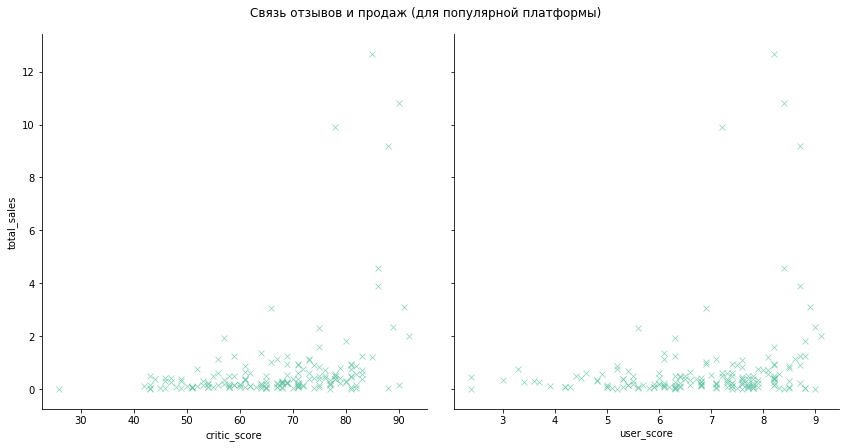

In [50]:
sns.pairplot(highest_rated_platform, 
             x_vars=['critic_score', 'user_score'], 
             y_vars='total_sales', 
             markers='x', 
             plot_kws={'alpha': 0.75}, 
             height=6).fig.suptitle('Связь отзывов и продаж (для популярной платформы)', y=1.03);

На диаграммах рассеяния видно, что оценки критиков более скученные, а оценки пользователей более разбросанные — критики чаще всего публикают отзывы, взвешенную оценку из которых собирает Metacritic, вместе или немного позже выхода игры, а пользователи, конечно, уже после покупки. Критики почти не ставят оценки ниже 40/100 и выше 85/100. Пользователи чаще, чем критики ставят очень низкие и очень высокие оценки, но основные оценки также собраны в «среднем» сегменте; в рейтинговых шкалах часто есть тенденция избегать крайних значений, поэтому оценка 5/10 — это скорее «плохо», чем «нормально». 

Тем не менее, можно заметить большее влияние и рейтинга критиков, и рейтинга пользователей на высоких значениях — т.е. если у игры высокие оценки, то и продажи этих игр выше. Однако достоверно сделать вывод, что именно высокие оценки побудили пользователей покупать игру или на это больше повлияло высокое качество, бренд студии-разработчика или высокая маркетинговая активность издателя, на этих данных нельзя. Для оценки степени этого влияния рассчитаем коэффициенты корреляции между рейтингами и продажами в разных регионах:

In [51]:
with pd.option_context('display.float_format', '{:.3f}'.format):
    display(highest_rated_platform.corr()[['critic_score', 'user_score']].filter(like='sales', axis=0))

,critic_score,user_score
na_sales,0.336,0.203
eu_sales,0.311,0.169
jp_sales,0.348,0.275
other_sales,0.323,0.187
total_sales,0.349,0.225


Все значения коэффициента корреляции невысокие, но значения для оценок критиков схожие, а для пользовательских оценок — более различные. Можем сделать осторожный вывод, что на решение о покупке пользователем игры на *3DS* действительно влияют оценки критиков, хотя и не очень сильно — по всем регионам это влияние примерно одинаковое; пользовательские оценки в целом влияют меньше, причем наименее важны такие оценки в Европе и других странах, а наиболее — в Японии (причем это наиболее достоверные наблюдения о японских пользователях).

На Nintendo 3DS пришлась почти четверть всех выпущенных в 8-м поколении игр до 2017 года. Посмотрим, подтвердятся ли наши выводы для остальных трех четвертей игр.

In [52]:
high_rated_platforms = games_gen8[games_gen8['platform'].isin(games_gen8['platform']
                                                                 .value_counts()
                                                                 .index[1:]
                                                                 .to_list())]
high_rated_platforms['platform'].value_counts()

PSV     430
PS4     392
PC      389
XOne    247
WiiU    147
Name: platform, dtype: int64

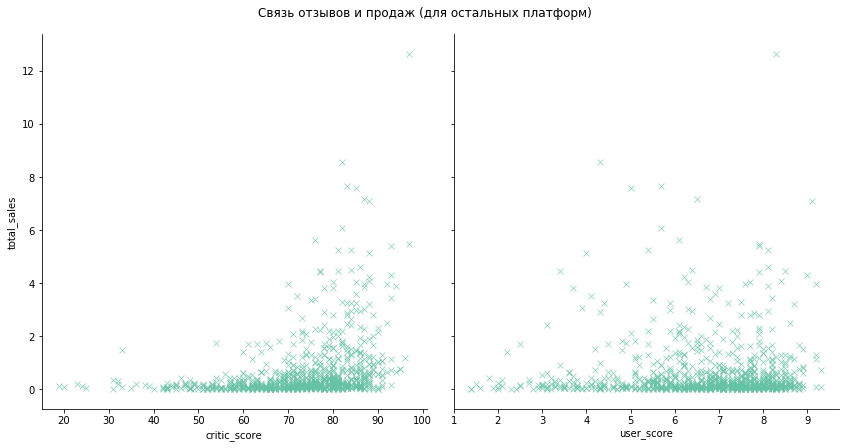

In [53]:
sns.pairplot(high_rated_platforms, 
             x_vars=['critic_score', 'user_score'], 
             y_vars='total_sales', 
             markers='x', 
             plot_kws={'alpha': 0.75}, 
             height=6).fig.suptitle('Связь отзывов и продаж (для остальных платформ)', y=1.03);

Здесь мы видим похожую ситуацию с предыдущими диаграммами: большая часть оценок критиков собрана от 40/100 до 85/100, также более заметная тенденция к влиянию рейтинга критиков на продажи — более успешные игры получили более высокие оценки от критиков, а игры с оценками критиков ниже 60/100 продавались хуже. 

Рейтинги пользователей также сильнее распределены между разными оценками, они также чаще ставят очень низкие оценки по сравнению с критиками, но в целом также тяготеют к верхней половине шкалы. Влияние пользовательских рейтингов кажется менее прямым — игры с высокими продажами получали и высокие, и низкие оценки. Вероятно, здесь сильнее сказывается последовательность рейтингов — пользователи ставят оценку после того, как купят игру, и значит они могли низко оценить относительно успешные в продажах релизы.

Оценим степень влияния рейтингов для этих платформ:

In [54]:
high_rated_platforms.corr()[['critic_score', 'user_score']].filter(like='sales', axis=0)

,critic_score,user_score
na_sales,0.306065,-0.002169
eu_sales,0.282276,-0.022800
jp_sales,0.126917,0.194160
other_sales,0.286811,-0.004760
total_sales,0.317749,0.005542


Коэффициенты корреляции отзывов критиков близки к таким значениям для самой популярной платформы, тенденция здесь сохраняется — кроме Японии (но продажи в Японии на этих платформах, как мы помним, значительно ниже остальных регионов). А пользовательские рейтинги на этих платформах влияния на продажи не оказывают.

<a id='307'></a>
### Общее распределение игр по жанрам

На столбцовых диаграммах рассмотрим количество игр 8-го поколения до 2017 года и их уровень продаж:

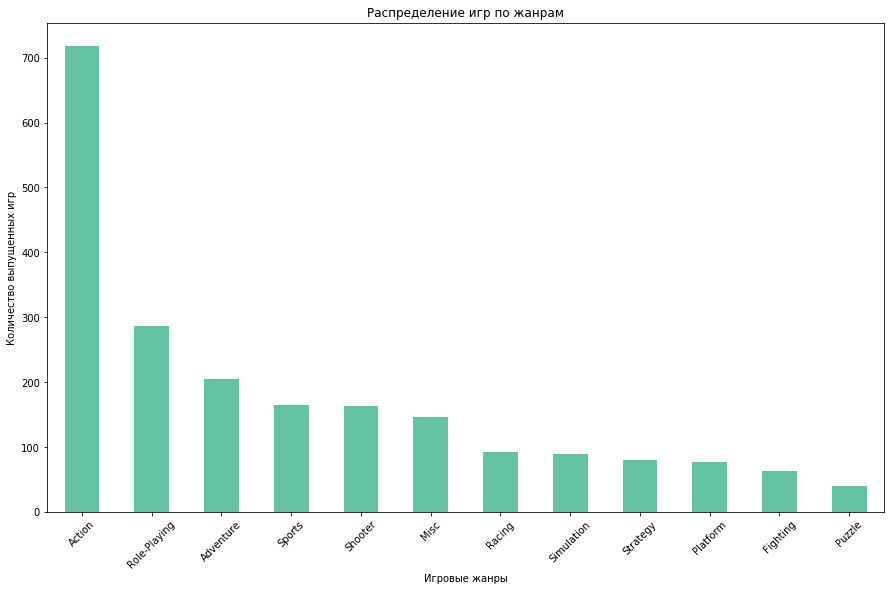

In [55]:
(games_gen8['genre'].value_counts()
 .plot(kind='bar', rot=45, title='Распределение игр по жанрам')
 .set(xlabel='Игровые жанры', ylabel='Количество выпущенных игр'));

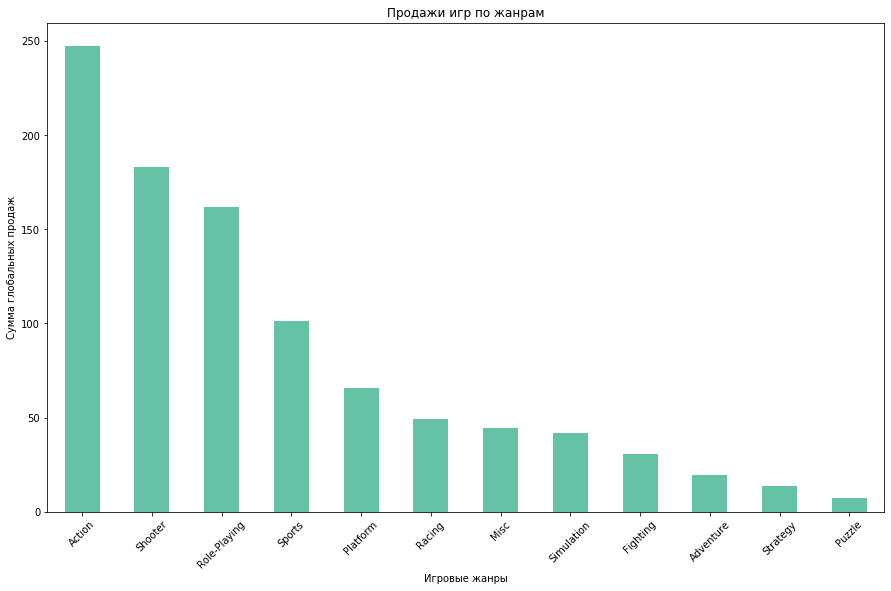

In [56]:
(games_gen8.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
 .plot(kind='bar', rot=45, title='Продажи игр по жанрам')
 .set(xlabel='Игровые жанры', ylabel='Сумма глобальных продаж'));

Абсолютное лидерство в популярности — за жанром action, в первой пятерке вместе с ним — ролевые, приключенческие, спортивные игры, а также шутеры. Продаются лучше всего также игры жанра action (здесь уже разрыв с другими жанрами не такой большой), за ним следуют шутеры, ролевые игры, спортивные игры и платформеры.

Таким образом, высокую группу по продажам образуют жанры *Action, Shooter* и *Role-Playing* с суммарной выручкой свыше 150 млн долларов, а низкую группу — жанры *Adventure, Strategy* и *Puzzle*.

Экшен — очень широкий жанр, отличительной особенностью которого является задействование физических возможностей игрока (например, скорость реакции). По этому принципу в экшен можно включить почти все остальные жанры — например, в соревновательных шутерах навыки и результативность игрока напрямую связаны со скоростью прицеливания и нажатия на кнопку выстрела, скорость ориентации в виртуальном пространстве и т.д., то же самое в автосимуляторах или платформерах. Поэтому, строго говоря, часто игры классифицируются несколькими жанрами (action-shooter, action-platformer).

Несмотря на то, что выпускаются довольно много приключенческих игр, они пользуются умеренным спросом; а вот небольшое количество платформеров, наоборот, оказалось довольно успешным. Платформеры — немного устаревший жанр, они были популярны в эпоху 8- и 16-битных приставок, но с развитием изометрического и 3D-изображения в играх (середина 90-х) интерес к жанру падал. Возросшая популярность платформеров в рамках текущего поколения обеспечивается во многом за счет волны новых игр в «ретро-стиле», которые имитируют пиксельную графику и классические игровые механики для желающих поностальгировать.

Точно можно сказать, что люди любят активные игры — их больше всего издают и за них больше всего платят.

<a id='308'></a>
### Выводы из исследовательского анализа данных

- Для прогноза на 2017 год нам было необходимо выбрать ту часть данных, анализ которых позволил бы сделать релевантные нашей задаче выводы. Мы решили отталкиваться от регулярного цикла обновления игровых консолей, который принято называть поколением — это группа с общими годами продаж и схожим аппаратным и программным оснащением. 
- При исследовании цикла жизни платформ с наибольшими суммарными продажами мы явным образом смогли увидеть тенденцию к росту и падению продаж игр, который укладывается во временные рамки того или иного поколения — в среднем такой период составил 10 лет.
- Для нашей задачи подходит текущее **8-е поколение**, которое начинается с 2011 года и включает в себя следующие платформы: портативные консоли *Sony PS Vita* и *Nintendo 3DS*, домашние консоли *Sony PS4*, *Microsoft Xbox One* и *Nintendo Wii U*, а также релизы игр на *PC*, которые укладываются во временной промежуток поколения.
- Значимая часть общих продаж в рамках этого периода — особенно в 2011 и 2012 году — приходится на популярные платформы предыдущего поколения (прежде всего, *PS3*, *Xbox 360* и *Wii*), но мы также показали, что продажи игр на этих консолях следуют циклу обновления и к 2016 году постепенно сходят на нет. Следовательно, для прогноза продаж на 2017 эти данные не нужны.

Итак, что мы выяснили при изучении игр на платформы 8-го поколения:
- Наиболее прибыльная платформа из всех — ***PS4***: продажи почти в 2 раза выше прямого конкурента *Xbox One* и почти в 4 раза выше *Wii U*. На втором месте — портативная консоль ***Nintendo 3DS***, которая обгоняет прямого конкурента *PS Vita* почти в 5 раз.
- Большинство игр по отдельности не приносят значительную выручку. Даже для самой прибыльной *PS4* большинство значений глобальных продаж игр находится в пределах до 750 тыс долларов. Основными двигателями продаж на всех платформах являются отдельные сверхуспешные бестселлеры, самые успешные приносят до 14 млн долларов. Но даже большинство игр *PS4* более прибыльные, чем игры на платформах конкурентов *Xbox One* и *Wii U*: вероятно, играют роль более успешные эксклюзивные релизы на платформе Sony.
- Игры, которые получили оценки критиков выше 70/100, продавались лучше — эта тенденция наблюдалась на всех платформах. Однако влияние этого рейтинга не очень сильное, на продажи очевидно влияют и другие факторы, которые не представлены в этих данных. Значение пользовательских оценок еще меньше.
- Самый прибыльные жанры на текущем поколении консолей — ***Action***, ***Shooter*** и ***Role-Playing***. 

<a id='part_4'></a>
## Шаг 4. Портрет пользователя каждого региона

<a id='401'></a>
### Продажи по платформам в разных регионах

Мы уже рассматривали выше продажи среди разных платформ по регионам вместе с глобальными показателями, но сейчас сфокусируемся только на региональных значениях:

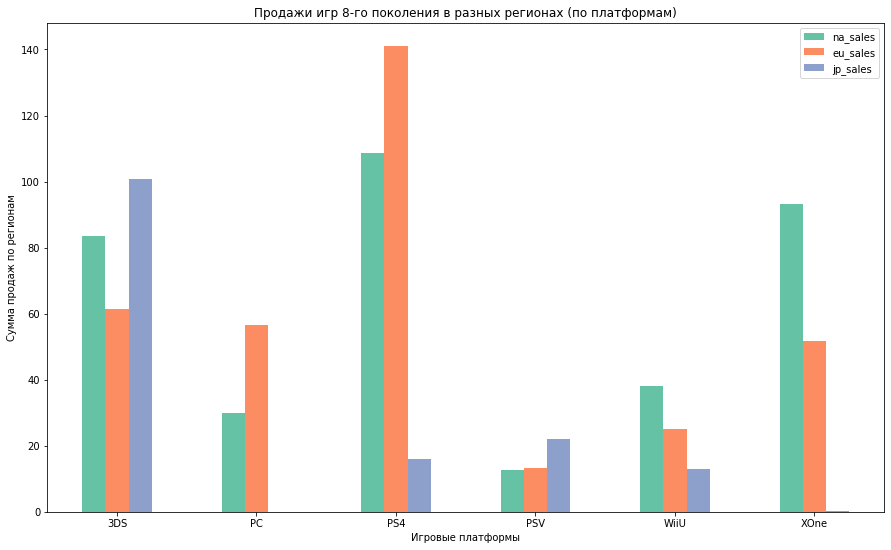

In [57]:
(games_gen8[['na_sales', 'eu_sales', 'jp_sales', 'platform']].groupby('platform').sum()
 .plot(kind='bar', rot=0, title='Продажи игр 8-го поколения в разных регионах (по платформам)')
 .set(xlabel='Игровые платформы', ylabel='Сумма продаж по регионам'));

На исследуемых нами платформах какая-либо четкая, повторяющаяся тенденция не прослеживается: разные платформы пользуются разным спросом по регионам:
- на **американском** рынке самая популярная консоль — *PS4*, затем следует *Xbox One* и *3DS*;
- на **европейском** рынке также лидирует *PS4*, за ней примерно на одном уровне *3DS*, *Xbox One* и *PC*;
- на **японском** рынке с большим отрывом побеждает *3DS*, ещё умеренным спросом пользуются (в порядке убывания) *PS Vita*, *PS4* и *Wii U*; игры *Xbox One* и *PC* в Японии почти не продаются;
- самая прибыльная платформа *PS4* больше спроса получает от европейских пользователей, чем от американских и японских.

<a id='402'></a>
### Самые популярные жанры (топ-5) в разных регионах

Рассмотрим 5 самых популярных жанров 8-го поколения по регионам:

In [58]:
top5_genres = games_gen8.groupby('genre')['total_sales'].sum().sort_values(ascending=False).head(5)
top5_genres

genre
Action          247.28
Shooter         182.99
Role-Playing    161.75
Sports          101.48
Platform         65.56
Name: total_sales, dtype: float64

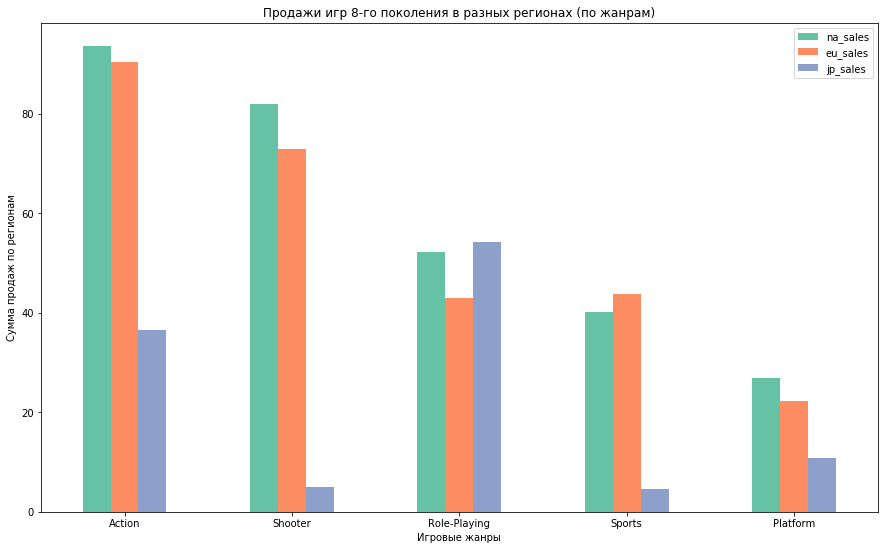

In [59]:
(games_gen8.query('genre.isin(@top5_genres.index)')[['na_sales', 'eu_sales', 'jp_sales', 'genre']]
 .groupby('genre').sum().sort_values(by='na_sales', ascending=False)
 .plot(kind='bar', rot=0, title='Продажи игр 8-го поколения в разных регионах (по жанрам)')
 .set(xlabel='Игровые жанры', ylabel='Сумма продаж по регионам'));

Топ-5 жанров по общим продажам в этом поколении — это (в порядке убывания):
1. экшены
2. шутеры
3. ролевые игры
4. спортивные игры
5. платформеры

Вот как они различаются по регионам:
- на **американском** рынке распределение топ-5 соответствует рейтингу по общим продажам;
- на **европейском** рынке спортивные игры пользуются чуть большим спросом, чем на американском; в этом регионе они немного популярнее ролевых игр;
- в **Японии** заметно лидируют ролевые игры, этот жанр в Японии в целом чуть более прибыльный, чем в остальных регионах (учитывая меньшую выручку на японском рынке).

Такая сверхпопулярность ролевых игр на японском рынке очевидно обусловлено поджанром *JRPG* (japanese role-playing game). Хотя в этом поджанре есть такие популярные по всему миру серии, как *Final Fantasy*, *Persona* и *Souls*, большинство *JRPG* ориентируются именно на японский рынок.

<a id='403'></a>
### Влияет ли рейтинг ESRB на продажи в отдельном регионе

Для изучаемого нами поколения игры получали следующие рейтинги:
- **E** (Everyone) — для всех возрастов
- **E10+** (Everyone 10+) — для детей старше 10 лет
- **T** (Teen) — старше 13 лет
- **M** (Mature) — старше 17 лет
- **RP** (Rating Pending) — рейтинг еще не выставлен (часто ставится для маркетинговых материалов до выхода игры)

ESRB выставляет рейтинг играм, которые будут продаваться на территории США и Канады — значит, теоретически если игра не выпускается на американском рынке, то и рейтинг она необязательно получит. Но в наших данных игры с таким рейтингом не вносят какой-либо значительный вклад в продажи.

In [60]:
games_gen8.groupby('rating')['total_sales'].sum().sort_values(ascending=False)

rating
M       268.79
E       213.24
T       123.39
E10+     97.25
RP        0.04
Name: total_sales, dtype: float64

In [61]:
games_gen8.groupby(['rating', 'platform'])[['na_sales', 'eu_sales', 'jp_sales', 'total_sales']].sum()

na_sales  eu_sales  jp_sales  total_sales
rating platform                                           
E      3DS          32.24     24.30     21.80        83.61
       PC            0.54      6.58      0.00         8.14
       PS4          16.76     27.56      0.84        53.57
       PSV           1.93      2.62      0.42         6.07
       WiiU         15.39     10.16      6.66        34.61
       XOne         14.40     10.46      0.04        27.24
E10+   3DS          12.51      7.87      4.53        26.74
       PC            1.44      2.84      0.00         4.77
       PS4           9.02      8.80      0.67        21.98
       PSV           1.38      2.37      0.34         4.99
       WiiU         11.80      8.01      2.75        24.40
       XOne          9.00      4.03      0.03        14.37
M      3DS           1.66      0.62      1.62         4.12
       PC           17.07     26.24      0.00        48.96
       PS4          42.81     58.43      5.23       125.91
       PSV           3.77      2.65      1.95        10.01
       WiiU          1.99      1.49      0.29         4.09
       XOne         44.92     23.74      0.19        75.70
RP     PC            0.00      0.03      0.00         0.04
T      3DS           6.73      3.67      6.99        18.35
       PC            9.17     13.40      0.00        25.44
       PS4          16.38     18.31      2.97        44.48
       PSV           3.48      2.76      6.11        13.86
       WiiU          2.21      1.46      0.47         4.51
       XOne         10.17      5.06      0.03        16.75

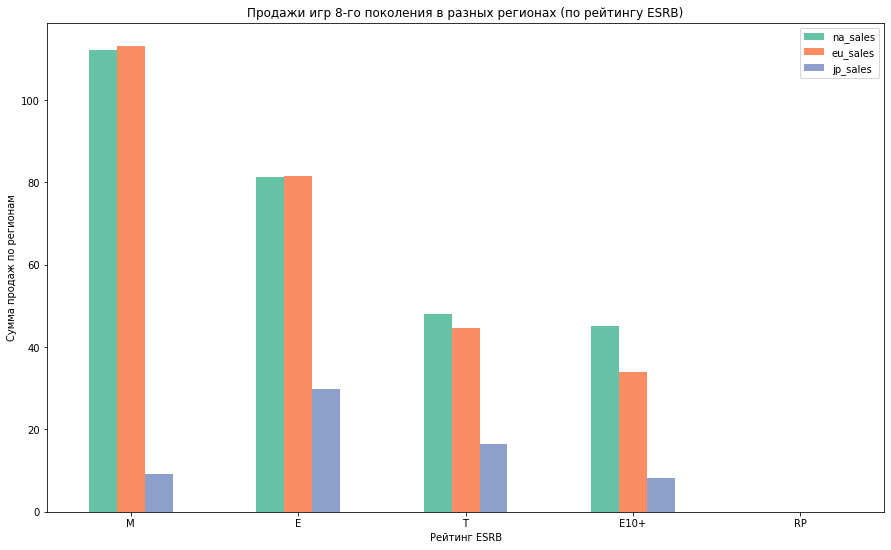

In [62]:
(games_gen8[['na_sales', 'eu_sales', 'jp_sales', 'rating']].groupby('rating').sum()
 .sort_values(by='na_sales', ascending=False)
 .plot(kind='bar', rot=0, title='Продажи игр 8-го поколения в разных регионах (по рейтингу ESRB)')
 .set(xlabel='Рейтинг ESRB', ylabel='Сумма продаж по регионам'));

Больше всего выручки принесли игры с рейтингов *Mature*, на втором месте — *Everyone*. Вот что можно сказать из распределения:
- вполне ожидаемо, что для значения *RP* почти нет продаж, это временный рейтинг — вероятно, сюда могли быть вписаны предзаказы за какие-то новые относительно изучаемого периода игры или у которых продажи на американском рынке начались позже других;
- на **американском** и **европейском** рынке спрос по рейтингам очень схожий: игры для аудитории старше 17 лет самые популярные, за ними идут игры без огранический по возрасту, игры для 13+ и для 10+. Игры с рейтингом *E10+* заметно более популярны на американском рынке, чем на европейском (но разница все равно небольшая).
- на **японском** рынке наибольшим спросом пользуются игры без ограничений по возрасту, потом идут (в порядке убывания) игры 13+, 17+ и 10+. Как мы помним, самая популярная платформа в Японии — портативная *3DS*; именно на этой консоли выходит больше игр с рейтингом *E*.

Как и оценки критиков, игра обычно получает рейтинг к старту продаж — соответственно, мы можем предполагать, что рейтинг влияет на решение о покупке. Однако такая связь может быть непрямой, и мы не можем достоверно утверждать, что игроки перед покупкой обращали внимание именно на рейтинг; может быть так, что игры рейтинга *Mature* более интересны по сюжетам и механике, раз для них меньше ограничений на внутриигровой контент.

<a id='404'></a>
### Выводы по портрету пользователя каждого региона

- На **американском** рынке примерно равным спросом пользуются игры на *PS4* и *Xbox One*, приставка от Sony немного впереди, портативная *3DS* также довольно популярна. В этом регионе больше всего предпочитают экшн-игры и шутеры с рейтингом M или E.
- На **европейском** рынке с отрывом лидирует *PS4*, а за ней примерно на одном уровне *Xbox One*, *PC* и *3DS*. Здесь также предпочитают экшены и шутеры с рейтингом M или E.
- На **японском** рынке выбирают больше всех игры на приставку *Nintendo 3DS* — вероятно, поэтому самые продаваемые игры в Японии с рейтингом E; игры на домашние консоли не пользуются большим успехом. Из жанров здесь предпочитают ролевые игры, экшены также относительно успешно. Отрыв ролевых игр, возможно, связан с популярностью поджанра *JRPG*, японских ролевых игр, большинство из которых ориентированы на локальный рынок.

<a id='part_5'></a>
## Шаг 5. Проверка гипотез

Здесь нам нужно будет оценить различия в средних значениях между отдельными платформами и жанрами, по которым мы сформулировали гипотезы. Поскольку анализируемые выборки платформ и жанров, средние значения которых мы будем сравнивать, не очень велики, есть смысл сделать выбор между параметрическим и непараметрическим критериями на основе оценки распределения данных в этих выборках. Для этого используем следующую функцию:

In [63]:
def equal_mean_test(sample_1: 'Series', sample_2: 'Series'):
    '''
    Функция нужна для выбора теста на проверку равенства двух средних в зависимости от распределения;
    она принимает в качестве аргумента 2 Series, 
    проверяет нормальность распределения тестом Шапиро-Уилка;
    
    если нулевая гипотеза о нормальности распределения отвергается, 
    равенство средних проверяется тестом Манна-Уитни;
    
    если нулевая гипотеза о нормальности распределения не отвергается, 
    равенство средних проверяется t-тестом Стьюдента;
    
    в результате выводит на экран p-значение выбранного теста 
    и результат сравнения с заданным уровнем значимости 
    '''
    
    
    # тест Шапиро-Уилка на соответствие распределения нормальному
    shapiro_stat_1, shapiro_p_1 = st.shapiro(sample_1)
    shapiro_stat_2, shapiro_p_2 = st.shapiro(sample_2)
    alpha = .05
    
    
    # гипотеза о нормальности распределения отвергается, используем тест Манна-Уитни
    if shapiro_p_1 < alpha and shapiro_p_2 < alpha:
        print('Отвергаем нулевую гипотезу о соответствии нормальному распределению')
        print('p-значение первой выборки (тест Шапиро-Уилка): {:.2f}'.format(shapiro_p_1))
        print('p-значение второй выборки (тест Шапиро-Уилка): {:.2f}'.format(shapiro_p_2))
        print()
        
        u_alpha = .01
        u_results = st.mannwhitneyu(sample_1, sample_2, alternative='two-sided')
        
        print('p-значение (U-тест Манна-Уитни): {:.10f}'.format(u_results.pvalue))
        if u_results.pvalue < u_alpha:
            print('Отвергаем нулевую гипотезу о равенстве средних')
        else:
            print('Не получилось отвергнуть нулевую гипотезу о равенстве средних')
    
    
    # гипотеза о нормальности распределения не отвергается, используем t-тест Стьюдента
    if shapiro_p_1 >= alpha and shapiro_p_2 >= alpha:
        print('Не получилось отвергнуть нулевую гипотезу о соответствии нормальному распределению')
        print('p-значение первой выборки (тест Шапиро-Уилка): {:.2f}'.format(shapiro_p_1))
        print('p-значение второй выборки (тест Шапиро-Уилка): {:.2f}'.format(shapiro_p_2))
        print()
        
        #определение критерия равенства дисперсий с помощью теста Левена
        levene = st.levene(sample_1, sample_2)
        lev_alpha = .01
        if levene.pvalue < lev_alpha:
            equal_var = False
        else:
            equal_var = True
        
        t_alpha = .01
        t_results = st.ttest_ind(sample_1, sample_2, equal_var=equal_var)
        
        print('p-значение: {:.10f}'.format(t_results.pvalue))
        print('Равенство дисперсий:', equal_var)
        if t_results.pvalue < t_alpha:
            print('Отвергаем нулевую гипотезу о равенстве средних')
        else:
            print('Не получилось отвергнуть нулевую гипотезу о равенстве средних')

<a id='501'></a>
### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Здесь мы проверям статистическую гипотезу о равенстве средних значений пользовательских оценок для Xbox One и PC. 
- **Нулевая гипотеза**: средние пользовательские оценки двух платформ равны.
- **Альтернативная гипотеза**: средние пользовательские оценки двух платформ равны различаются.

Сначала посмотрим размеры двух выборок и оценим их распределение с помощью P-P-графика (probability-probability), который проверяет соответствие фактического и теоретического распределения. А затем для проверки гипотезы используем вышеуказанную функцию для выбора критерия проверки средних. Выборку составляем без учета пропусков, чтобы не допустить искажения средних.

In [64]:
user_score_xone = games_gen8.query('platform == "XOne" and user_score.notna()')['user_score']
user_score_pc = games_gen8.query('platform == "PC" and user_score.notna()')['user_score']

print('Выборка на Xbox One:', len(user_score_xone))
print('Выборка на PC:', len(user_score_pc))

Выборка на Xbox One: 182
Выборка на PC: 307


Важно отметить при сравнении этих платформ, что обе развиваются компанией Microsoft; с 2016 года они по сути объединены в одну платформу и делят многие релизы между собой — это значит, что эксклюзивная для *Xbox One* игра также должна сразу или через некоторое время выйти на Windows 10, а выпуск игр на обе платформы был и в предыдущие года. Но есть однако игры, которые выходят только на ПК и не выходят на консолях. 

В данной выборке до 2016 года содержатся по крайней мере 16 игр как полные эксклюзивы *Xbox One* (которые не издавались на ПК); за их исключением две выборки могут иметь общую долю игр до 54%. Это не означает напрямую, что у них будут абсолютно одинаковые объемы продаж и пользовательские оценки, т.к. на Metacritic это все равно разные позиции, но значительно рейтинги внутри одной мультиплатформенной игры обычно не различаются.

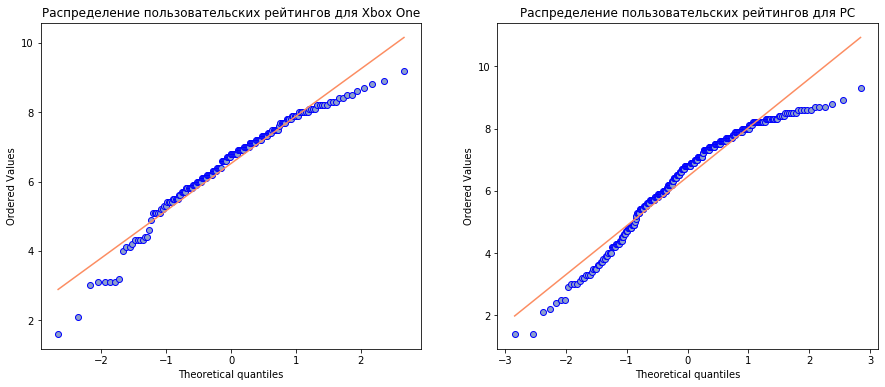

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
i = 0

for data in [user_score_xone, user_score_pc]:
    st.probplot(data, dist='norm', plot=ax[i])
    ax[i].get_lines()[0].set_markerfacecolor('#8da0cb')
    ax[i].get_lines()[1].set_color('#fc8d62')
    i += 1

ax[0].set_title('Распределение пользовательских рейтингов для Xbox One')
ax[1].set_title('Распределение пользовательских рейтингов для PC');

На P-P-графиках мы видим, что обе выборки недостататочно близки к теоретическому нормальному распределению, и с учетом относительно небольшого размера выборок логично будет применить для сравнения средних непараметрический U-тест Манна-Уитни. 

In [66]:
# применение функции по выбору теста для сравнения двух средних независимых выборок
equal_mean_test(user_score_xone, user_score_pc)
print()
print('Средний пользовательский рейтинг для Xbox One: {:.2f}'.format(user_score_xone.mean()))
print('Средний пользовательский рейтинг для PC: {:.2f}'.format(user_score_pc.mean()))

Отвергаем нулевую гипотезу о соответствии нормальному распределению
p-значение первой выборки (тест Шапиро-Уилка): 0.00
p-значение второй выборки (тест Шапиро-Уилка): 0.00

p-значение (U-тест Манна-Уитни): 0.8414826595
Не получилось отвергнуть нулевую гипотезу о равенстве средних

Средний пользовательский рейтинг для Xbox One: 6.52
Средний пользовательский рейтинг для PC: 6.45


Функция на основе теста Шапиро-Уилка также позволила отвергнуть гипотезу о нормальном распределении, поэтому для сравнения средних был применен непараметрический критерий. На основе p-значения этого теста с вероятностью 84% или больше между средними нет статистически значимых различий. 

Возможным объяснением может служить, как мы писали выше, вероятная общая доля релизов на двух платформах, которая покрывает большинство игр в выборке.

<a id='502'></a>
### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Повторим процедуру для сравнения средних оценок пользователей между жанрами Action и Sports.
- **Нулевая гипотеза**: средние пользовательские оценки двух жанров равны.
- **Альтернативная гипотеза**: средние пользовательские оценки двух жанров различаются.

In [67]:
user_score_action = games_gen8.query('genre == "Action" and user_score.notna()')['user_score']
user_score_sports = games_gen8.query('genre == "Sports" and user_score.notna()')['user_score']

print('Выборка на жанр Action:', len(user_score_action))
print('Выборка на жанр Sports:', len(user_score_sports))

Выборка на жанр Action: 378
Выборка на жанр Sports: 120


Как мы и выяснили ранее при исследовании общего распределения игр по жанрам, экшн-игры являются самыми успешными по продажам и наиболее популярные по количеству выпущенных игр в изучаемом нами периоде.

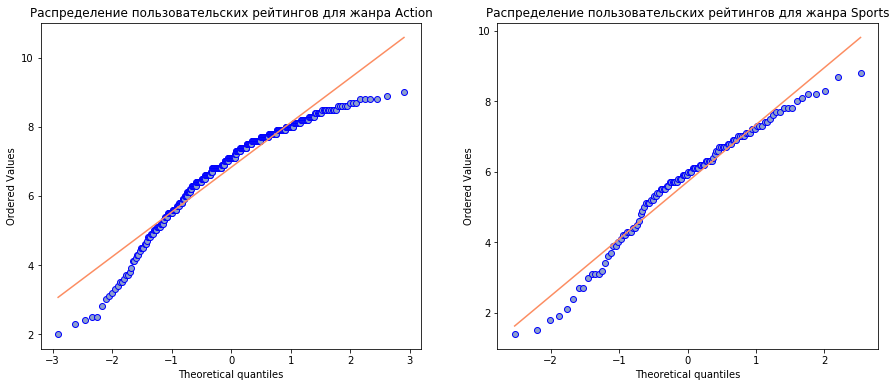

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
i = 0

for data in [user_score_action, user_score_sports]:
    st.probplot(data, dist='norm', plot=ax[i])
    ax[i].get_lines()[0].set_markerfacecolor('#8da0cb')
    ax[i].get_lines()[1].set_color('#fc8d62')
    i += 1

ax[0].set_title('Распределение пользовательских рейтингов для жанра Action')
ax[1].set_title('Распределение пользовательских рейтингов для жанра Sports');

Аналогично обе выборки недостататочно близки к теоретическому нормальному распределению, поэтому предполагаем проверку на равенство средних при помощи непараметрического U-теста Манна-Уитни.

In [69]:
# применение функции по выбору теста для сравнения двух средних независимых выборок
equal_mean_test(user_score_action, user_score_sports)
print()
print('Средний пользовательский рейтинг для жанра Action: {:.2f}'.format(user_score_action.mean()))
print('Средний пользовательский рейтинг для жанра Sports: {:.2f}'.format(user_score_sports.mean()))

Отвергаем нулевую гипотезу о соответствии нормальному распределению
p-значение первой выборки (тест Шапиро-Уилка): 0.00
p-значение второй выборки (тест Шапиро-Уилка): 0.00

p-значение (U-тест Манна-Уитни): 0.0000000000
Отвергаем нулевую гипотезу о равенстве средних

Средний пользовательский рейтинг для жанра Action: 6.83
Средний пользовательский рейтинг для жанра Sports: 5.72


Функция на основе теста Шапиро-Уилка также позволила отвергнуть гипотезу о нормальном распределении, поэтому для сравнения средних был применен непараметрический критерий. На основе p-значения этого теста с крайне малой вероятностью ошибки мы можем заключить, что между средними есть статистически значимые различия.

Таким образом, мы можем сделать достоверный вывод, что в среднем пользователи более высоко оценивают игры жанра *Action* по сравнению с жанром *Sports* на платформах 8-го поколения.

<a id='503'></a>
### Выводы из проверки гипотез

Соответствие или несоответствие распределения выборок с пользовательскими оценками нормальному виду побуждает использовать параметрические или непараметрические критерии для сравнения двух средних независимых выборок соответственно. Похоже, что данные согласно тесту Шапиро-Уилка во всех четырех выборках не были распределены нормально, поэтому для проверки равенства двух средних использовался непараметрический U-критерий Манна-Уитни (впрочем, даже при использовании здесь t-теста Стьюдента выводы по гипотезам остаются теми же).

В результате проверки оказалось, что мы можем сделать обоснованный вывод о различии среднего пользовательского рейтинга жанром *Action* и *Sports*: экшн-игры оцениваются более высоко, чем спортивные; разница между ними — более одного пункта: экшены получают в среднем почти 7/10, а спортивные не дотягивают до 6/10.

А вывод о разнице между средним пользовательским рейтингом на *Xbox One* и *PC* мы сделать исходя из текущих данных не можем — это может быть связано с тем, что эти платформы делят большую долю игр между собой, и в более чем половине случаем пользователи оценивали одни и те же игры на разных платформах.

<a id='part_6'></a>
## Шаг 6. Общий вывод

Напомним, что в исследовании мы использовали данные об играх с сайта-агрегатора Metacritic до 2016 года включительно, а целью было обнаружение и изучение сегмента данных, которые помогут сделать прогноз по продажам игр в 2017 году. Для этого мы выбрали данные об играх, которые были выпущены с 2011 по 2016 год на следующих платформах: портативные консоли *Sony PS Vita* и *Nintendo 3DS*, домашние консоли *Sony PS4*, *Microsoft Xbox One* и *Nintendo Wii U*, а также релизы игр на *PC* в указанные годы. Такой выбор мы сделали на основании принятого в индустрии цикла обновления консолей, называемого поколением, который в среднем занимает 10 лет — это мы также подтвердили при изучении самых популярных консолей вообще. Собственно говоря, мы выбрали платформы, которые соответствуют актуальному на 2017-й год поколению.

Как мы уже упомянули, среди изучаемых нами платформ есть портативные и домашние консоли (PC здесь имеет отношение к домашним). Хотя из данных не наблюдается много ключевых различий между этими категориями консолей, нужно иметь ввиду, что особенности распространения игр между ними не совсем одинаковые. Например, на мобильные консоли вышло больше игр в количестве. Поэтому мы будем сравнивать закономерности не только по всем платформам, но и между категориями.

Вот какие закономерности, влияющие на продажи игр, мы обнаружили:
- Большинство игр на всех платформах по отдельности продаются не в очень большом объеме. Локомотивом продаж на всех платформах являются небольшое количество игр-бестселлеров. Такие игры можно частично определить по оценкам критиков, которые появляются с релизом игры — на всех платформах все бестселлеры за редкими исключениями получали оценки выше 70/100. Это не очень сильный предиктор, но тенденция заметна.
- Абсолютный лидер среди всех платформ — *PS4*: консоль лидирует по выручке с проданных игр, на нее выпускают больше бестселлеров, общая масса игр также продается лучше. Консоль пользуется большим спросом на американском и европейском рынке.
- Среди мобильных консолей с отрывом лидирует *Nintendo 3DS*: она занимает второе место среди всех платформ по выручке и значительно обгоняет прямого конкурента в своей категории. Эта консоль достаточно популярна на всех региональных рынках, но наиболее успешна в Японии. На эту консоль в основном выходят игры с рейтингом *E*.
- Самый прибыльные жанры на текущем поколении консолей — *Action*, *Shooter* и *Role-Playing*.
- Есть региональные предпочтения в играх: 
    - в Америке среди домашних платформ выручка между *PS4* и *Xbox One* различается несильно, эти платформы здесь живо конкурируют; популярность по жанрам следует более общему тренду; лучше всего продаются игры с рейтингом *Mature* и *Everyone*; 
    - в Европе *PS4* заметно превосходит другие платформы; спортивные игры здесь чуть популярнее ролевых; самые популярные игры здесь также с рейтингом *Mature* и *Everyone*; 
    - в Японии домашние платформы не очень популярны, а наибольшим спросом пользуются игры на *3DS*; из жанров здесь лидируют ролевые игры; хорошо продаются игры с рейтингом Everyone и Teen.

Таким образом, можно ожидать, что на американском и европейском рынках будут лучше всего продаваться экшены и шутеры с рейтингом *М* на *PS4*; на японском будут пользоваться наибольшим спросом экшены и ролевые игры на *3DS* с рейтингом *E*. Чтобы найти нужные игры, можем следить за оценками критиков при релизе. Исходя из этого, будет хорошей идеей таргетировать рекламу новых игр с учетом региональных предпочтений, указанных выше, и попробовать включить в рекламу рейтинг Metacritic или отзывы ключевых игровых медиа для отдельного региона.

Игры на платформы предыдущих поколений (*PS3*, *Xbox 360*, *Wii*) не будут пользоваться высоким спросом в 2017 году, их могут только покупать по востребованию отдельные держатели этих консолей как ретро-игры.